In [41]:
import numpy as np
from scipy import fftpack
from scipy import optimize
from matplotlib import pyplot as plt
from lens_simulation import Lens, Simulation

In [83]:
amplitude = 10000
pixel_size = 0.01e-6 
n_slices = 1000

# height doesnt matter when defining a refractor

lens = Lens.Lens(
    diameter=4500e-6,
    height=100e-6,
    exponent=2.,
    medium=Lens.Medium(1.0)
)

In [84]:
n = 2.348
n = 1.5
f = 40e-3
radius=lens.diameter/2
pixel_size = 1e-6

# 120 um height

n_pixels = int(radius / pixel_size)
# n_pixels must be odd (symmetry).
if n_pixels % 2 == 0:
    n_pixels += 1

# x coordinate of pixels (TODO: better name)
radius_px = np.linspace(0, radius, n_pixels)

print(radius_px)


[0.000e+00 1.000e-06 2.000e-06 ... 2.248e-03 2.249e-03 2.250e-03]


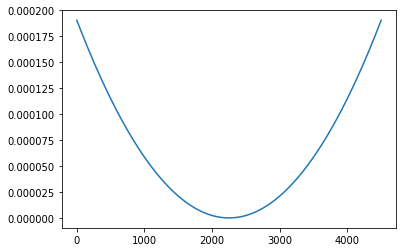

1.0


In [85]:
roots = []

for value in radius_px:
    # print(value)
    profile_equation = lambda s: np.square(s - (n/n+1)*f) + (np.square(n))/(np.square(n)-1) * np.square(value) - np.square((n*f)/(n+1))
    root = optimize.newton(profile_equation, value, maxiter=200000)
    roots.append(root)

from_zero = abs(roots-np.max(roots))
profile = np.append(np.append(np.flip(from_zero), np.max(from_zero)),from_zero)

lens.profile = profile
centre_px = (len(lens.profile)-1)//2
# print(centre_px)
# print(len(lens.profile))
# plt.plot(lens.profile)
# plt.show()

air_profile = np.max(lens.profile) - lens.profile
plt.plot(air_profile)
plt.show()

lens.profile = air_profile
print(lens.medium.refractive_index)


In [86]:
A = 10000
output_medium = Lens.Medium(n)
sim_wavelength = 488e-9
step_size = 0.01e-6

4503


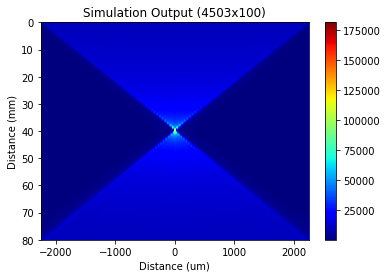

In [87]:
frequency_array_1 = Simulation.generate_squared_frequency_array(
    n_pixels=len(lens.profile), pixel_size=pixel_size)

print(len(frequency_array_1))

delta_1 = (lens.medium.refractive_index-output_medium.refractive_index) * lens.profile
phase_1 = (2 * np.pi * delta_1 / sim_wavelength) % (2 * np.pi)
wavefront_1 = A * np.exp(1j * phase_1)
wavefront_1 = fftpack.fft(wavefront_1)

start_distance_1 = 0.
finish_distance_1 = 2*f

n_slices_1 = 100

sim_1 = np.ones(shape=((n_slices_1), len(lens.profile)))
distances_1 = np.linspace(start_distance_1, finish_distance_1, n_slices_1)
for i, z in enumerate(distances_1):
    prop_1 = np.exp(1j * output_medium.wave_number * z) * np.exp(
        (-1j * 2 * np.pi ** 2 * z * frequency_array_1) / output_medium.wave_number
    )
    # print("prop shape: ", prop.shape)
    propagation = fftpack.ifft(prop_1 * wavefront_1)

    output = np.sqrt(propagation.real ** 2 + propagation.imag ** 2)

    sim_1[i] = np.round(output, 10)
from lens_simulation import utils
utils.plot_simulation(sim_1, sim_1.shape[1], sim_1.shape[0], pixel_size, start_distance_1, finish_distance_1)
# plt.imshow(sim)
plt.show()

passed_wavefront = propagation
